# Explainer notebook for 02805 Social Graphs - Group 11


We explore how american politicians are connected through wikipedia pages. We use the wikipedia pages of the politicians to create a graph of politicians and their connections. We then analyze several aspects of the graph. 

### Outline


### Packages

In [41]:
import matplotlib.pyplot as plt 
import pickle
import networkx as nx
import re
import os
import json
import os
from nltk.tokenize import word_tokenize
import json
from tqdm import tqdm
import urllib.request
import requests
from collections import Counter
import numpy as np



## 1. Data loading and preprocessing

### 1.1 Scraping data from wikipedia
The data is scraped from wikipedia using the wikipedia API. We couldn't find a good list of all american politicians, so we had to several lists to get a good coverage of politicians. We then use the wikipedia API to get the links from the wikipedia pages of the politicians.

In [ ]:
def get_category_members(category_name, cmcontinue=None):
    url = "https://en.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "list": "categorymembers",
        "cmtitle": f"Category:{category_name}",
        "cmlimit": "500",  
        "cmcontinue": cmcontinue, 
        "format": "json",
    }
    response = requests.get(url, params=params) 
    data = response.json()
    return data

def get_all_category_members(category_name):
    members = []
    cmcontinue = None

    while True:
        data = get_category_members(category_name, cmcontinue)
        members.extend(data['query']['categorymembers']) 
        
        cmcontinue = data.get('continue', {}).get('cmcontinue')
        if not cmcontinue:
            break

    return [member['title'] for member in members]

politicians21th = get_all_category_members("21st-century American politicians")
politicians20th = get_all_category_members("20th-century American politicians")
politicians21th_presidential_electors = get_all_category_members("21st-century United States presidential electors")
politicians21th_vice_presidents = get_all_category_members("21st-century vice presidents of the United States")
politicians21th_presidents = get_all_category_members("21st-century presidents of the United States")
politicians21th_party_for_soc_and_lib_politicians = get_all_category_members("Party for Socialism and Liberation politicians")
politicians21th_mayors = get_all_category_members("21st-century mayors of places in the United States")
politicians21th_legislators = get_all_category_members("21st-century American legislators")
politicians21th_justice = get_all_category_members("Justice Party (United States) politicians")
politicians21th_green_party = get_all_category_members("Green Party of the United States politicians")
politicians21th_farrigth = get_all_category_members("21st-century American far-right politicians")
politicians21th_soldiarity = get_all_category_members("American Solidarity Party politicians")
politicians21th_delta = get_all_category_members("American Delta Party politicians")
politicians21th_women = get_all_category_members("21st-century American women politicians")
politicians21th_candidates = get_all_category_members("21st-century candidates in United States elections by year")
politicians21th_native = get_all_category_members("21st-century Native American politicians")
politicians21th_state = get_all_category_members("21st-century American politicians by state")
politicians21th_insular = get_all_category_members("21st-century politicians from insular areas of the United States")
politicians21th_african = get_all_category_members("21st-century African-American politicians")

# Save the lists as .txt 
with open("politicians_21st_century.txt", "w", encoding="utf-8") as file_21st:
    for politician in politicians21th:
        file_21st.write(politician + "\n")

with open("politicians_20th_century.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians20th:
        file_20th.write(politician + "\n")
        
with open("politicians21th_presidential_electors.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_presidential_electors:
        file_20th.write(politician + "\n")
        

with open("politicians21th_vice_presidents.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_vice_presidents:
        file_20th.write(politician + "\n")
        

with open("politicians21th_presidents.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_presidents:
        file_20th.write(politician + "\n")
        

with open("politicians21th_party_for_soc_and_lib_politicians.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_party_for_soc_and_lib_politicians:
        file_20th.write(politician + "\n")
        

with open("politicians21th_mayors.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_mayors:
        file_20th.write(politician + "\n")
        

with open("politicians21th_legislators.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_legislators:
        file_20th.write(politician + "\n")
        
with open("politicians21th_justice.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_justice:
        file_20th.write(politician + "\n")
        
with open("politicians21th_green_party.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_green_party:
        file_20th.write(politician + "\n")
        
with open("politicians21th_farrigth.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_farrigth:
        file_20th.write(politician + "\n")
        
with open("politicians21th_soldiarity.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_soldiarity:
        file_20th.write(politician + "\n")
        
with open("politicians21th_delta.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_delta:
        file_20th.write(politician + "\n")
        
with open("politicians21th_women.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_women:
        file_20th.write(politician + "\n")
        
with open("politicians21th_candidates.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_candidates:
        file_20th.write(politician + "\n")
        
with open("politicians21th_native.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_native:
        file_20th.write(politician + "\n")
        
with open("politicians21th_state.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_state:
        file_20th.write(politician + "\n")
        
with open("politicians21th_insular.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_insular:
        file_20th.write(politician + "\n")


with open("politicians21th_african.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_african:
        file_20th.write(politician + "\n")

In [ ]:
files = os. listdir("Politicians")
politicians = []
for file in files:
    
    with open("Politicians/"+file, "r", encoding="utf8") as f:
        p = f.read()
        p = p.split("\n")
        p = [line for line in p if not line.startswith("Category")]
        p = [line for line in p if line != ""]
        politicians = list(set(politicians + p))

for i,p in enumerate(politicians):

    if i % 100 == 0:
        print(f"Processing politician {i} of {len(politicians)}")

    try:
        baseurl = "https://en.wikipedia.org/w/api.php?"
        action = "action=query"
        title = "titles="+p.replace(" ", "_")
        content = "prop=revisions&rvprop=content"
        dataformat ="format=json"

        query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
        #print(query)

        wikiresponse = urllib.request.urlopen(query)
        wikidata = wikiresponse.read()
        wikitext = wikidata.decode('utf-8')


        js = json.loads(wikitext) 

        #save json to file in contry folder
        with open("../wiki_pages/"+p.replace(" ", "_")+".json", "w", encoding="utf-8") as f:
            json.dump(js, f, ensure_ascii=False, indent=2)
    except:
        print("error with "+p)
        continue


### 1.2 Graph creation
We create a graph of the politicians and their connections by iterating over the wikipedia pages we have collected. We use the links in the wikipedia pages to create the connections between the politicians.

In [ ]:
G = nx.DiGraph()

m = len(os.listdir("../wiki_pages"))
for filename in os.listdir("../wiki_pages"):
    G.add_node(filename[:-5])

for i,filename in enumerate(os.listdir("../wiki_pages")):
    if i % 1000 == 0:
         print(i, "/", m)
   
    with open("../wiki_pages/"+filename, "r", encoding="utf-8") as f:
        try: 
            data = json.load(f)
            
            wikitext = data["query"]["pages"]
            page = list(wikitext.keys())[0]
            wikitext = wikitext[page]["revisions"][0]["*"]

            nb = set(re.findall(r'\[\[([^\|\]]+)(?:\|[^\]]+)?\]\]', wikitext))

            for n in nb:
                n = n.replace(" ", "_")
                if n in G.nodes and not G.has_edge(filename[:-5], n) and filename[:-5] != n:
                    G.add_edge(filename[:-5], n)

        except:
            print(filename)
            continue

G.remove_nodes_from(list(nx.isolates(G)))

pickle.dump(G, open('G_politicans.pickle', 'wb'))

### 1.3 Basic statistics
We look at some basic statistics of the graph, such as the number of nodes and edges, the average degree, and the degree distribution. This is to make sure that the graph is reasonable and that we have collected enough data.

In [ ]:
G = pickle.load(open('G_politicans.pickle', 'rb'))

print(f"Number of nodes: {len(G.nodes())}")
print(f"Number of edges: {len(G.edges())}")
print(f"Max degree: {max(dict(G.degree()).values())}")
print(f"name of vertex with max degree: {max(dict(G.degree()), key=dict(G.degree()).get)}")
print(f"Max out degree: {max(dict(G.out_degree()).values())}")
print(f"name of vertex with max out degree: {max(dict(G.out_degree()), key=dict(G.out_degree()).get)}")
print(f"Max in degree: {max(dict(G.in_degree()).values())}")
print(f"name of vertex with max in degree: {max(dict(G.in_degree()), key=dict(G.in_degree()).get)}")
print(f"Min degree: {min(dict(G.degree()).values())}")
print(f"Average degree: {sum(dict(G.degree()).values())/G.number_of_nodes()}")

Number of nodes: 20534
Number of edges: 80506
Max degree: 1315
name of vertex with max degree: Donald_Trump
Max out degree: 96
name of vertex with max out degree: List_of_politicians_affiliated_with_the_Tea_Party_movement
Max in degree: 1297
name of vertex with max in degree: Donald_Trump
Min degree: 1
Average degree: 7.841238920814259


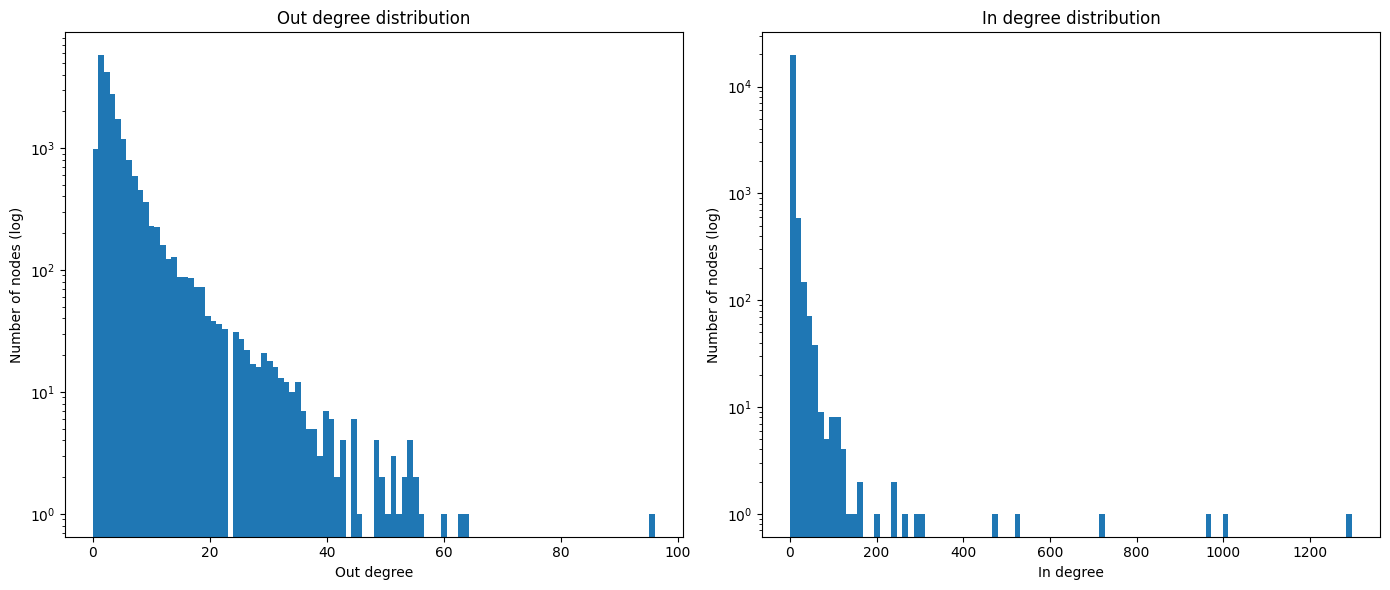

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Out degree distribution
out_degrees = [G.out_degree(n) for n in G.nodes()]
axs[0].hist(out_degrees, bins=100)
axs[0].set_title("Out degree distribution")
axs[0].set_xlabel("Out degree")
axs[0].set_ylabel("Number of nodes (log)")
axs[0].set_yscale('log')

# In degree distribution
in_degrees = [G.in_degree(n) for n in G.nodes()]
axs[1].hist(in_degrees, bins=100)
axs[1].set_title("In degree distribution")
axs[1].set_xlabel("In degree")
axs[1].set_ylabel("Number of nodes (log)")
axs[1].set_yscale('log')

plt.tight_layout()
plt.show()

### 1.4 Node attributes and data cleaning
We collect some attributes of the nodes, such as the party of the politician, gender and sentiment of their wikipedia page. We then remove nodes with missing attributes. We also make sure to remove nodes that are not connected to the main component of the graph.

In [ ]:
# Initialize an empty dictionary
word_dict = {}

# Read the file line by line
with open(r'LabMT_wordlist.txt', 'r', encoding='cp1252') as f:
    # Skip the header line
    next(f)
    for line in f:
        # Split the line into components
        parts = line.strip().split('\t')
        word = parts[0]
        happiness_rank = int(parts[1])
        happiness_average = float(parts[2])
        happiness_standard_deviation = float(parts[3])
        twitter_rank = float(parts[4]) if parts[4] != '--' else None
        google_rank = float(parts[5]) if parts[5] != '--' else None
        nyt_rank = float(parts[6]) if parts[6] != '--' else None
        lyrics_rank = float(parts[7]) if parts[7] != '--' else None
      
        # Add the word and its attributes to the dictionary
        word_dict[word] = {
            'happiness_rank': happiness_rank,
            'happiness_average': happiness_average,
            'happiness_standard_deviation': happiness_standard_deviation,
            'twitter_rank': twitter_rank,
            'google_rank': google_rank,
            'nyt_rank': nyt_rank,
            'lyrics_rank': lyrics_rank
        }

# Function to calculate sentiment for a given text
def calculate_sentiment(text):
    tokens = word_tokenize(text.lower())
    sentiment_sum = 0
    word_count = 0
    for token in tokens:
        if token in word_dict:
            sentiment_sum += word_dict[token]['happiness_average']
            word_count += 1
    if word_count > 0:
        return sentiment_sum / word_count
    else:
        return None

In [ ]:
from tqdm import tqdm

wiki_pages = "./wiki_pages"

for node in tqdm(list(G.nodes()), desc="Processing nodes"):
    node_file = f"{node}.json"
    if os.path.exists(os.path.join(wiki_pages, node_file)):
        with open(os.path.join(wiki_pages, node_file), 'r', encoding="utf-8") as f:
            try:
                data = json.load(f)
                wikitext = data["query"]["pages"]
                page = list(wikitext.keys())[0]
                wikitext = wikitext[page]["revisions"][0]["*"]
                
                # Find party
                match = re.search(r'\bparty\b.*?\|([^]]+)\]\]', wikitext, re.IGNORECASE)
                if match:
                    party = match.group(1)
                    if len(party) < 50:
                        G.nodes[node]['party'] = party
                
                # Find gender
                text = json.dumps(data).lower()
                he_count = len(re.findall(r'\bhe\b|\bhim\b|\bhis\b', text))
                she_count = len(re.findall(r'\bshe\b|\bher\b|\bhers\b', text))
                if he_count > she_count:
                    G.nodes[node]['gender'] = "male"
                elif she_count > he_count:
                    G.nodes[node]['gender'] = "female"
                else:
                    G.nodes[node]['gender'] = "unknown"
                
                # Calculate sentiment
                sentiment = calculate_sentiment(wikitext)
                if sentiment is not None:
                    G.nodes[node]["sentiment"] = sentiment
                else:
                    print(f"Sentiment could not be calculated for {node}")
            except:
                print(f"Error in file: {node_file}")
                continue

In [ ]:
for node in G.nodes():
    if 'party' in G.nodes[node] and (G.nodes[node]['party'] in ['Democratic', 'Democrat', 'Democratic Party', 'Democratic Party (United States)', 'DFL', 'Democratic (DFL)', 'Democratic-Farmer-Labor', 'Democratic–Farmer–Labor', 'Democratic-Farmer-Labor Party', 'Democratic-Farmer-Labor Party (Minnesota)', 'DFL party', 'Farmer-Labor'] or re.search(r'democrat', G.nodes[node]['party'], re.IGNORECASE)):
        G.nodes[node]['party'] = 'Democratic'

    if 'party' in G.nodes[node] and (G.nodes[node]['party'] in ['Republican', 'Republican Party', 'Republican Party (United States)', 'GOP', 'Texas Republican Party'] or re.search(r'republican', G.nodes[node]['party'], re.IGNORECASE)):
        G.nodes[node]['party'] = 'Republican'

    if 'party' in G.nodes[node] and re.search(r'green', G.nodes[node]['party'], re.IGNORECASE):
        G.nodes[node]['party'] = 'Green'

    if 'party' in G.nodes[node] and re.search(r'libertarian', G.nodes[node]['party'], re.IGNORECASE):
        G.nodes[node]['party'] = 'Libertarian'

    if 'party' in G.nodes[node] and re.search(r'independent', G.nodes[node]['party'], re.IGNORECASE):
        G.nodes[node]['party'] = 'Independent'

    if 'party' in G.nodes[node] and re.search(r'socialist', G.nodes[node]['party'], re.IGNORECASE):
        G.nodes[node]['party'] = 'Socialist'
  

parties = ['Democratic', 'Republican', 'Libertarian', 'Green', 'Independent', 'Socialist']
count_party = 0
no_party = 0
for node in G.nodes():
    if 'party' in G.nodes[node] and G.nodes[node]['party'] not in parties:
        # print(f"Node {node} has a party {G.nodes[node]['party']} not in the list of parties.")
        count_party += 1
    if 'party' not in G.nodes[node]:
        no_party += 1

print(f"Total nodes with parties not in the list: {count_party}")
print(f"Total nodes with no party: {no_party}")

party_counts = Counter(nx.get_node_attributes(G, 'party').values())
print(party_counts)

In [ ]:
female_count = sum(1 for _, attr in G.nodes(data=True) if attr.get("gender") == "female")
male_count = sum(1 for _, attr in G.nodes(data=True) if attr.get("gender") == "male")
unknown_count = sum(1 for _, attr in G.nodes(data=True) if attr.get("gender") == "unknown")

print(f"Antal kvinder: {female_count}")
print(f"Antal mænd: {male_count}")
print(f"Antal unknown: {unknown_count}")

In [ ]:
nodes_to_remove1 = [node for node, attr in G.nodes(data=True) if attr.get("gender") == "unknown"]
nodes_to_remove2 = [node for node in G.nodes() if 'party' not in G.nodes[node] or G.nodes[node]['party'] not in parties]
nodes_to_remove3 = [node for node in G.nodes() if 'sentiment' not in G.nodes[node]]

print(f"removing: {len(nodes_to_remove1) + len(nodes_to_remove2) + len(nodes_to_remove3)}", "nodes")

G.remove_nodes_from(nodes_to_remove1)
G.remove_nodes_from(nodes_to_remove2)
G.remove_nodes_from(nodes_to_remove3)

G.remove_nodes_from(list(nx.isolates(G)))

In [ ]:
# save graph object to file
pickle.dump(G, open('G_politicans_final.pickle', 'wb'))

## 2. Analysis

In [ ]:
G = pickle.load(open('G_politicans_final', 'rb'))

### 2.1 Modularity
We partition the graph by party, gender and the louvain method. We then calculate the modularity of the partitions.

In [37]:
# partition the graph after party. 
party_partition = {}
for node in G.nodes(data=True):
    attribute = node[1]['party']
    if attribute not in party_partition:
        party_partition[attribute] = [node[0]]
    else:
        party_partition[attribute].append(node[0])
# calculate the modularity of the partition
party_modularity = nx.algorithms.community.modularity(G, party_partition.values())

# partition the graph after genre attribute using party genre. 
gender_partition = {}
for node in G.nodes(data=True):
    attribute = node[1]['gender']
    if attribute not in gender_partition:
        gender_partition[attribute] = [node[0]]
    else:
        gender_partition[attribute].append(node[0])
# calculate the modularity of the partition
gender_modularity = nx.algorithms.community.modularity(G, gender_partition.values())

# use louvain method to partition the graph
louvain_partition = nx.community.louvain_communities(G, seed=11)
# calculate the modularity of the partition
louvain_modularity = nx.algorithms.community.modularity(G, louvain_partition)

print('The graph is divided in', len(party_partition))
print('The modularity of the partition is', party_modularity)
print('The graph is divided in', len(gender_partition))
print('The modularity of the partition is', gender_modularity)
print('The graph is divided in',len(louvain_partition))
print('The modularity of the partition is', louvain_modularity)

The graph is divided in 6
The modularity of the partition is 0.2194473613965019
The graph is divided in 2
The modularity of the partition is 0.04626400380728418
The graph is divided in 4602
The modularity of the partition is 0.5257979958007897


### 2.2 Friendship paradox

In [ ]:
def friendship_paradox(G):
    #We calculated the fraction of nodes, which have a degree less than the mean degree
    # of their neigboors in F-BA for all nodes instead of a random sample 1000 nodes.
    
    paradox = 0 
    for node in G.nodes:
        nb = list(G.neighbors(node))
        nbavgnb = np.mean([G.degree(n) for n in nb])

        if(G.degree[node] < nbavgnb): 
            paradox += 1 

    fraction_paradox = paradox / len(G.nodes)

    return fraction_paradox

fraction_paradox = friendship_paradox(G)
print(f"Fraction of nodes, which have a degree less than the mean degree of their neigboors in F-BA: {fraction_paradox}")

C:\Users\Mathilde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Mathilde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Fraction of nodes, which have a degree less than the mean degree of their neigboors in F-BA: 0.7732490434203959


### 2.3 TF-IDF